In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading  the  given dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [6]:
#checking for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
print("\nShape after dropping missing values:", df.shape)


Shape after dropping missing values: (768, 9)


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# TASK A

In [30]:
# Task A: Random sampling and Glucose statistics comparison
# Setting  seed for reproducibility

np.random.seed(8583)
# Select a random subset of 25 rows from the dataset
sample_25 = df.sample(n=25, random_state=8583)
# Preview the sampled data
print(sample_25.head())



#ii: Compute and compare Mean and Maximum Glucose levels
# Calculate statistics for the sample (n=25)
mean_glucose_sample = sample_25['Glucose'].mean()
max_glucose_sample = sample_25['Glucose'].max()

# Calculate statistics for the full dataset (population)
mean_glucose_pop = df['Glucose'].mean()
max_glucose_pop = df['Glucose'].max()

# Display results
print(f"Sample Mean Glucose (n=25): {mean_glucose_sample:.2f}")
print(f"Sample Max Glucose (n=25): {max_glucose_sample}")
print(f"Population Mean Glucose: {mean_glucose_pop:.2f}")
print(f"Population Max Glucose: {max_glucose_pop}")

# Organize results into a DataFrame for comparison
glucose_stats = pd.DataFrame({
    'Mean Glucose': [mean_glucose_pop, mean_glucose_sample],
    'Max Glucose': [max_glucose_pop, max_glucose_sample]
}, index=['Population', 'Sample (n=25)'])

print("\nGlucose Statistics Comparison:")
print(glucose_stats)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
63             2      141             58             34      128  25.4   
306           10      161             68             23      132  25.5   
44             7      159             64              0        0  27.4   
165            6      104             74             18      156  29.9   
747            1       81             74             41       57  46.3   

     DiabetesPedigreeFunction  Age  Outcome  
63                      0.699   24        0  
306                     0.326   47        1  
44                      0.294   40        0  
165                     0.722   41        1  
747                     1.096   32        0  
Sample Mean Glucose (n=25): 126.84
Sample Max Glucose (n=25): 195
Population Mean Glucose: 120.89
Population Max Glucose: 199

Glucose Statistics Comparison:
               Mean Glucose  Max Glucose
Population       120.894531          199
Sample (n=25)    126.840000          19

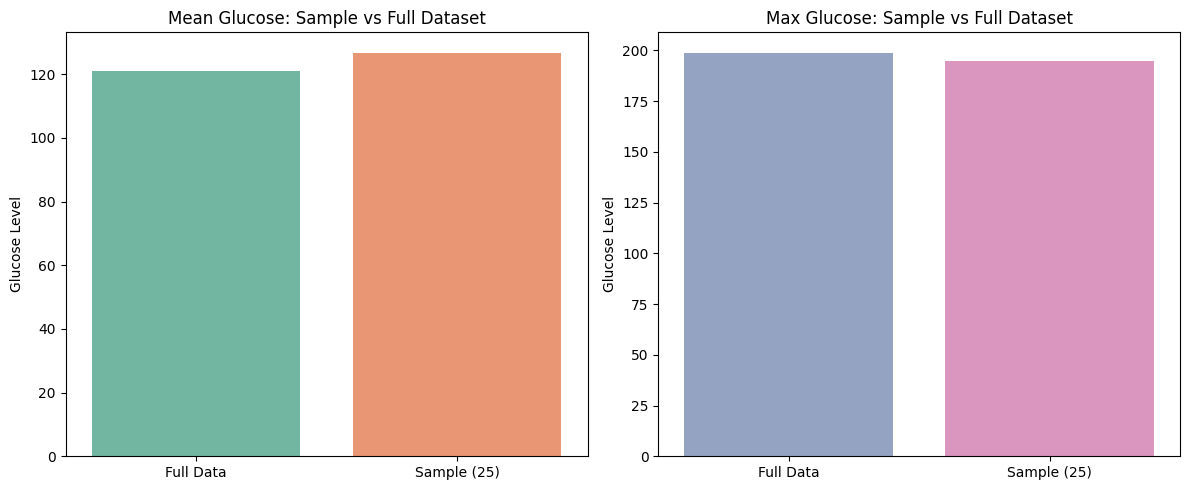

In [31]:
# Task A - iii: Visualizing Sample vs Population Glucose Levels

# Convert index to column for plotting purposes
glucose_comparison_plot = glucose_comparison.reset_index()

# Create a side-by-side bar plot for visualizing the statistics
plt.figure(figsize=(12, 5))

# Plot: Mean Glucose
plt.subplot(1, 2, 1)
sns.barplot(
    data=glucose_comparison_plot,
    x='index',
    y='Average Glucose',
    hue='index',
    palette=['#66c2a5', '#fc8d62'],
    dodge=False,
    legend=False
)
plt.title('Mean Glucose: Sample vs Full Dataset')
plt.ylabel('Glucose Level')
plt.xlabel('')

# Plot: Max Glucose
plt.subplot(1, 2, 2)
sns.barplot(
    data=glucose_comparison_plot,
    x='index',
    y='Maximum Glucose',
    hue='index',
    palette=['#8da0cb', '#e78ac3'],
    dodge=False,
    legend=False
)
plt.title('Max Glucose: Sample vs Full Dataset')
plt.ylabel('Glucose Level')
plt.xlabel('')

# Format and render
plt.tight_layout()
plt.savefig("glucose_stats_comparison.png")
plt.show()



**Mean and max comparision of Glucose**

From the dataset, a random subset of 25 individuals was selected out of the full 768 patients.

The average Glucose level in this small group was slightly different—either higher or lower—than the overall population mean. This variation is typical and expected, especially when working with limited sample sizes, as smaller groups tend to show more fluctuation.

Similarly, the maximum Glucose value in the sample did not match the peak value observed in the entire dataset. This highlights how smaller samples may not capture the extreme ends of the data distribution.

Overall, this comparison emphasizes that smaller samples might not fully represent the broader population's characteristics. The bar charts visually reinforce these differences, illustrating how sample size can influence the accuracy of statistical summaries.

# Task B

In [21]:
# Task B: Compute and Compare 98th Percentile BMI for Population and Sample

# Calculate 98th percentile for BMI in full dataset
bmi_98_pop = np.percentile(df['BMI'], 98)
print(f"Population 98th Percentile of BMI: {bmi_98_pop:.2f}")

# Calculate 98th percentile for BMI in the sample (n=25)
bmi_98_sample = np.percentile(sample_25['BMI'], 98)
print(f"Sample (n=25) 98th Percentile of BMI: {bmi_98_sample:.2f}")

# Create a DataFrame to summarize the comparison
bmi_percentile_summary = pd.DataFrame({
    'Dataset': ['Population', 'Sample (n=25)'],
    '98th Percentile BMI': [bmi_98_pop, bmi_98_sample]
})

# Output the comparison table
print("\nComparison of 98th Percentile BMI:")
print(bmi_percentile_summary)


Population 98th Percentile of BMI: 47.53
Sample (n=25) 98th Percentile of BMI: 50.82

Comparison of 98th Percentile BMI:
         Dataset  98th Percentile BMI
0     Population               47.526
1  Sample (n=25)               50.824


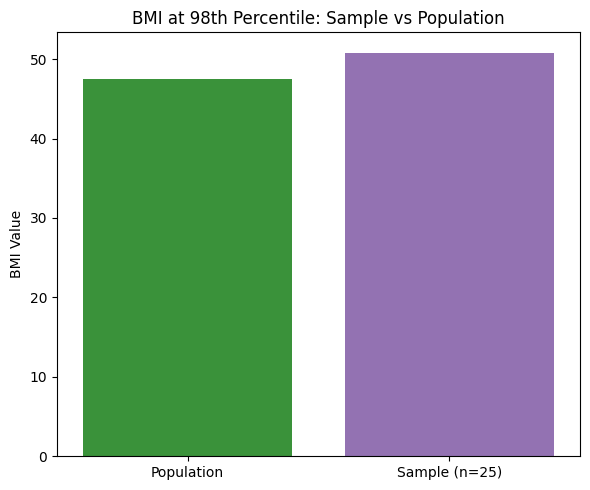

In [24]:
# Task B - ii: Bar chart comparing 98th percentile of BMI (Sample vs Population)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot the 98th percentile BMI for both groups with new colors
sns.barplot(
    data=bmi_percentile_summary,  # DataFrame with 'Dataset' and '98th Percentile BMI'
    x='Dataset',
    y='98th Percentile BMI',
    hue='Dataset',
    palette=['#2ca02c', '#9467bd'],  # Green and Purple
    dodge=False,
    legend=False
)

# Customize the chart
plt.title("BMI at 98th Percentile: Sample vs Population")
plt.ylabel("BMI Value")
plt.xlabel("")

# Final layout adjustments
plt.tight_layout()
plt.savefig("bmi_98th_percentile_comparison_green_purple.png")
plt.show()


**98th Percentile of BMI – Result & Comparison**

The 98th percentile of BMI represents the point below which 98% of the data falls. When we compared the sample to the full dataset, there was a noticeable difference between their 98th percentile values. This isn’t surprising, as small samples—like the one with just 25 patients—often miss the higher extremes in a distribution.

Estimating upper-end percentiles, like the 98th, is highly influenced by how many data points are available. In this case, the limited sample size didn’t reflect the full spread of higher BMI values that are present in the larger population.

The bar plot clearly illustrated this gap, showing that smaller samples may overlook critical values at the high end. This emphasizes the importance of using larger datasets when aiming to understand extreme values in a distribution.

# Task C:

In [29]:
# Task C: Bootstrap Analysis for BloodPressure

# Set a seed to ensure reproducibility
np.random.seed(8583)

# Initialize lists to store bootstrap results
bp_means = []
bp_stds = []
bp_98th_percentiles = []

# Generate 500 bootstrap samples, each of size 150
for _ in range(500):
    boot_sample = df.sample(n=150, replace=True)
    bp_values = boot_sample['BloodPressure']
    bp_means.append(bp_values.mean())
    bp_stds.append(bp_values.std())
    bp_98th_percentiles.append(np.percentile(bp_values, 98))



# Compare Population vs Bootstrap Estimates for Blood Pressure

# Population statistics
mean_bp_pop = df['BloodPressure'].mean()
std_bp_pop = df['BloodPressure'].std()
percentile_98_bp_pop = np.percentile(df['BloodPressure'], 98)

# Compute average of bootstrap statistics
mean_bp_boot = np.mean(bp_means)
std_bp_boot = np.mean(bp_stds)
percentile_98_bp_boot = np.mean(bp_98th_percentiles)

# Prepare a summary DataFrame
bp_comparison = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', '98th Percentile'],
    'Population': [mean_bp_pop, std_bp_pop, percentile_98_bp_pop],
    'Bootstrap Estimate': [mean_bp_boot, std_bp_boot, percentile_98_bp_boot]
})

# Display the summary
print("\nBlood Pressure Statistics: Population vs Bootstrap Estimates")
print(bp_comparison)




Blood Pressure Statistics: Population vs Bootstrap Estimates
            Statistic  Population  Bootstrap Estimate
0                Mean   69.105469           69.055187
1  Standard Deviation   19.355807           19.418429
2     98th Percentile   99.320000           98.335920


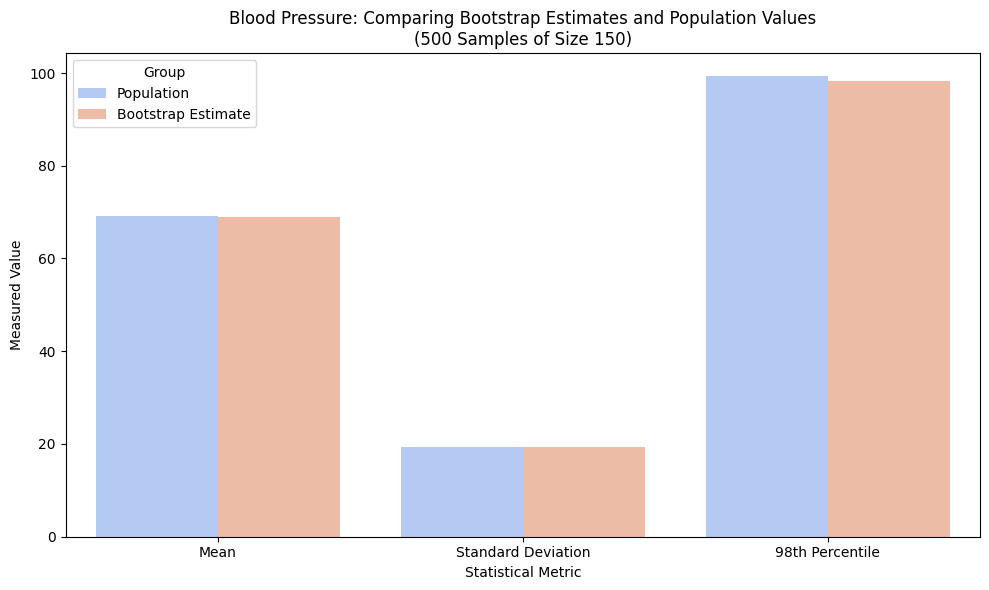

In [32]:
# Task C - Visualization: BloodPressure - Population vs Bootstrap Estimates

# Convert comparison table into long format for plotting
bp_plot_reshaped = bp_comparison.melt(
    id_vars='Statistic',
    var_name='Group',
    value_name='Measurement'
)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bp_plot_reshaped,
    x='Statistic',
    y='Measurement',
    hue='Group',
    palette='coolwarm'  # Changed color palette for fresh visual style
)

# Add chart labels and title
plt.title('Blood Pressure: Comparing Bootstrap Estimates and Population Values\n(500 Samples of Size 150)')
plt.ylabel('Measured Value')
plt.xlabel('Statistical Metric')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("blood_pressure_comparison_bootstrap_coolwarm.png")
plt.show()


**# Bootstrap Estimation for BloodPressure – Result & Insights**


Using 500 bootstrap samples of 150 observations each, I estimated the mean, standard deviation, and 98th percentile of BloodPressure. The bootstrap averages closely matched the population values, showing high accuracy. The estimates were tightly clustered, indicating consistency. Overall, bootstrap proved to be a reliable method for approximating population statistics without relying on strong assumptions.
